In [2]:
import pathlib
import cv2
import numpy as np
import time
import itertools

from collections import Counter

from tqdm import tqdm_notebook

from matplotlib import pyplot as plt
from matplotlib import ticker

from mpl_toolkits.axes_grid1 import ImageGrid
from skimage import data, img_as_float
from skimage.measure import compare_ssim as ssim

import os
import pandas as pd
import seaborn as sns

from scipy.ndimage.filters import gaussian_filter1d
from scipy import signal

In [19]:
# FOR FINDING VALLEYS -- I.E. Similar poses

p = pathlib.Path('/Volumes/NO NAME/sleeper/computed_results/diff_arrs/')
folders_list = ([x for x in sorted(p.iterdir()) if x.is_file()])

save_path_pose = '/Volumes/NO NAME/sleeper/computed_results/pose_arrs/'
save_path_durations = '/Volumes/NO NAME/sleeper/computed_results/pose_duration_arrs/'
save_path_graph = '/Volumes/NO NAME/sleeper/computed_results/sleep_plots/'

save_path_sum_valleys = '/Volumes/NO NAME/sleeper/computed_results/sum_valleys.npy'
sum_valleys_list = []

for f in tqdm_notebook(folders_list):
    print("Date: {}".format(f.stem))
    diff_arr = np.load(f)
   
    # Scale to 0 to 1
    diff_arr = (diff_arr-diff_arr.min())/(diff_arr.max()-diff_arr.min())
        
    mean = np.mean(diff_arr)
    std = np.std(diff_arr)
    mean_line = np.repeat(mean, np.size(diff_arr))
    std_line = np.repeat(mean + std, np.size(diff_arr))
    print("Mean difference: {}".format(mean))
    
    smooth_arr = gaussian_filter1d(diff_arr, 2)
    
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(14., 10.))
    g =  sns.lineplot(data=mean_line, label='Mean diff')
    sns.lineplot(data=std_line, label='Mean + std')
    sns.lineplot(data=diff_arr, label='Image Diffs')
    sns.lineplot(data=smooth_arr, linewidth=3, label='Guassian smooth')

    g.lines[0].set_linestyle("--")
    g.lines[1].set_linestyle("--")   
    g.lines[2].set_linestyle(":")
    
    valleys, valley_properties = signal.find_peaks(-smooth_arr, width=10)
    print("Valleys: {}".format(valleys))
    
    plt.plot(valleys, smooth_arr[valleys], "o", markersize=10, label='Pose')
    plt.hlines(y=-valley_properties["width_heights"], 
               xmin=valley_properties["left_ips"],
               xmax=valley_properties["right_ips"],
               color='C4', 
               label="Pose duration")
    rounded_durations = np.round(valley_properties['widths'])
    score = sum(rounded_durations)
    sum_valleys_list.append(score)
    print("Valley durations: {}".format(rounded_durations))
    
    # Save valleys, valley durations 
    np.save("{}{}.npy".format(save_path_pose, f.stem),
        valleys)
    np.save("{}{}.npy".format(save_path_durations, f.stem),
        rounded_durations)

    # Add legend, title, and axis labels
    plt.legend()
    plt.title('Sleep Summary: {}\nScore: {}'.format(f.stem, score))
    plt.xlabel('Time (minutes)')
    plt.ylabel('Scaled image difference')
    
    # Save graphs
    plt.savefig("{}{}.png".format(save_path_graph, f.stem))
    
    plt.close()
    
    print("\n")
    
sum_valleys_arr = np.array(sum_valleys_list)
np.save(save_path_sum_valleys, sum_valleys_arr)

Date: 2019-02-18
Mean difference: 0.16906199415698647
Valleys: [ 31  66  83 140 187]
Valley durations: [13. 48. 15. 60. 39.]


Date: 2019-02-20
Mean difference: 0.20270340879651325
Valleys: [ 19 131 175 197 238]
Valley durations: [50. 44. 62. 21. 12.]


Date: 2019-02-21
Mean difference: 0.1652128277043225
Valleys: [ 35  87 128 168]
Valley durations: [48. 28. 64. 10.]


Date: 2019-02-22
Mean difference: 0.1667085870368762
Valleys: [ 30  85 140 175 197 226]
Valley durations: [30. 73. 12. 26. 12. 20.]


Date: 2019-02-25
Mean difference: 0.15164129154557637
Valleys: [ 43  90 123 169 189 206 224]
Valley durations: [ 34.  15.  37.  14.  13.  12. 103.]


Date: 2019-02-26
Mean difference: 0.1321556765527408
Valleys: [  8  46 146 188 203 222]
Valley durations: [12. 40. 52. 14. 15. 94.]


Date: 2019-02-27
Mean difference: 0.11915528572472459
Valleys: [ 16  42  72 131 181 202 215 273]
Valley durations: [ 11.  89.  12.  35.  16.  16. 162.  32.]


Date: 2019-02-28
Mean difference: 0.132088925616123



Date: 2019-05-05-21
Mean difference: 0.20634468148755367
Valleys: [ 51 101 147 170 205 228]
Valley durations: [22. 18. 11. 41. 12. 14.]


Date: 2019-05-06-19
Mean difference: 0.19640481047951178
Valleys: [ 30  65 128 156 217 262]
Valley durations: [21. 30. 15. 24. 26. 77.]


Date: 2019-05-07-20
Mean difference: 0.27432415084375417
Valleys: [ 80 219 238]
Valley durations: [10. 16. 15.]


Date: 2019-05-08-21
Mean difference: 0.18287299482140698
Valleys: [ 23  74 107 161 182]
Valley durations: [15. 13. 65. 34. 22.]





0.1684442027536354
PEAKS: [  8  16  27  43  52  96 111 118 164 208 221 243]
Valleys: [ 31  66  83 140 187]
{'prominences': array([0.29097945, 0.41462609, 0.0614969 , 0.3074482 , 0.35941777]), 'left_bases': array([  0,   0,  72,  96, 164]), 'right_bases': array([ 43, 243, 164, 164, 243]), 'widths': array([12.97825866, 48.528734  , 15.1085562 , 60.38614628, 39.29987311]), 'width_heights': array([-0.2697441 , -0.25661468, -0.08597495, -0.21274312, -0.23307602]), 'left_ips': array([ 27.17834711,  45.48896664,  75.50600995, 100.37690434,
       168.16647805]), 'right_ips': array([ 40.15660578,  94.01770064,  90.61456615, 160.76305062,
       207.46635116])}


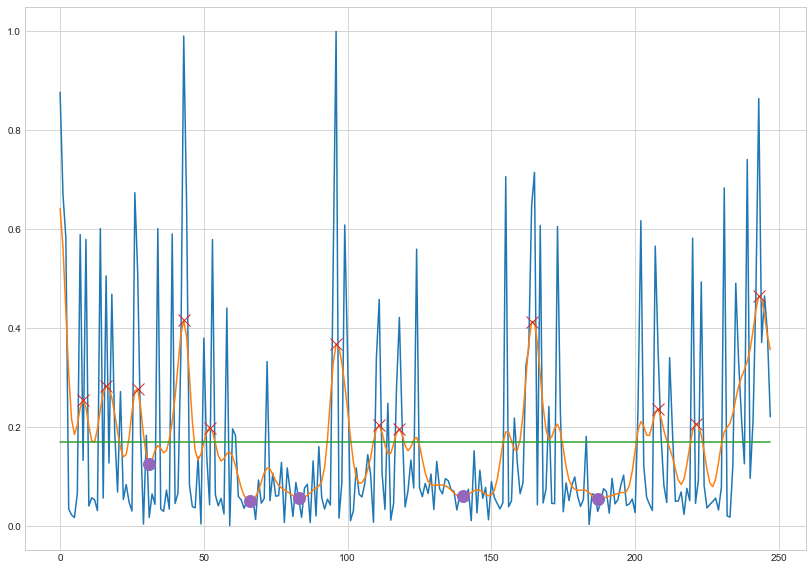

0.1770692737817458
PEAKS: [ 37  59  73  92 103 119 184 208 224]
Valleys: [ 19 131 175 197 238]
{'prominences': array([0.27561543, 0.10823424, 0.30443888, 0.28488319, 0.2918675 ]), 'left_bases': array([  0,  92,  92, 184, 224]), 'right_bases': array([ 92, 169, 224, 224, 244]), 'widths': array([50.16345466, 43.86909087, 61.12645266, 21.4712221 , 12.73188642]), 'width_heights': array([-0.19394739, -0.11575856, -0.2049235 , -0.20475731, -0.37678467]), 'left_ips': array([  6.08840958, 122.53105778, 120.00596413, 186.52800982,
       228.71284741]), 'right_ips': array([ 56.25186424, 166.40014865, 181.13241679, 207.99923192,
       241.44473383])}


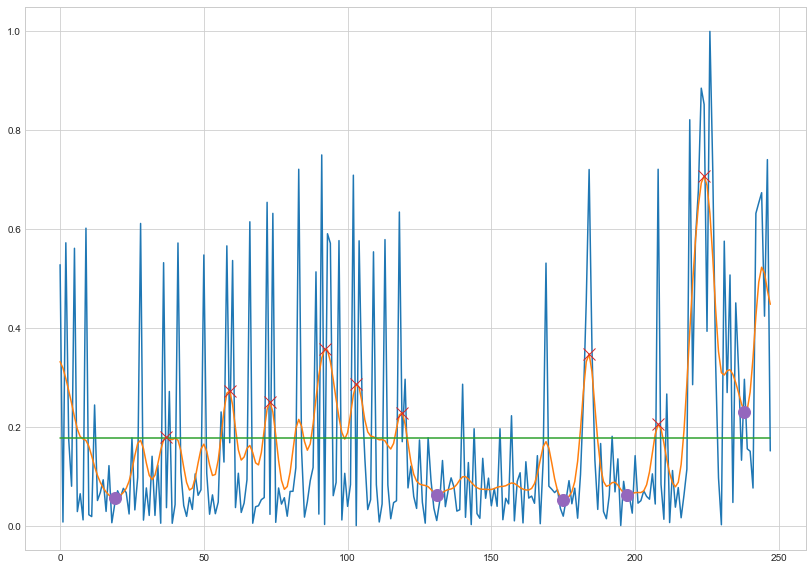

0.1507135208035196
PEAKS: [ 16  72 107 119 161 176 188 203]
Valleys: [ 35  87 128 168]
{'prominences': array([0.28295568, 0.29525548, 0.35892133, 0.1015296 ]), 'left_bases': array([ 16,  72,  72, 161]), 'right_bases': array([203, 119, 203, 203]), 'widths': array([47.65567771, 27.86596182, 62.55360379, 10.33013483]), 'width_heights': array([-0.18093612, -0.20176005, -0.22242375, -0.10904886]), 'left_ips': array([ 19.13309305,  76.00976927, 121.49468849, 163.43042611]), 'right_ips': array([ 66.78877076, 103.8757311 , 184.04829229, 173.76056094])}


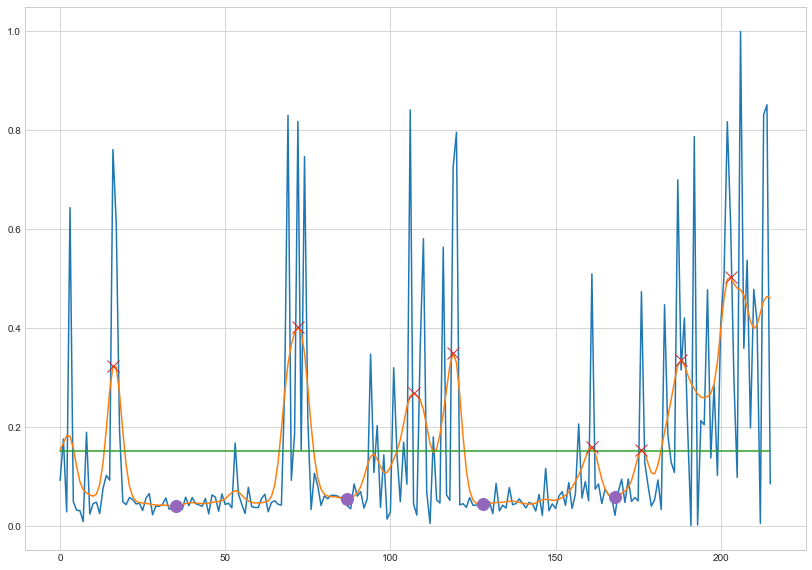

0.16739118069286124
PEAKS: [ 36 122 145 157 188 205 235]
Valleys: [ 30  85 140 175 197]
{'prominences': array([0.24008374, 0.31246144, 0.18011795, 0.25015019, 0.32273983]), 'left_bases': array([  0,   0, 122, 122, 122]), 'right_bases': array([ 36, 235, 145, 188, 235]), 'widths': array([30.00116478, 72.84664358, 11.99617548, 26.21702308, 11.41438735]), 'width_heights': array([-0.17509829, -0.20687477, -0.25198579, -0.18148784, -0.21675146]), 'left_ips': array([  3.35292084,  37.77533846, 130.72482565, 159.26186892,
       190.35418508]), 'right_ips': array([ 33.35408562, 110.62198204, 142.72100113, 185.478892  ,
       201.76857243])}


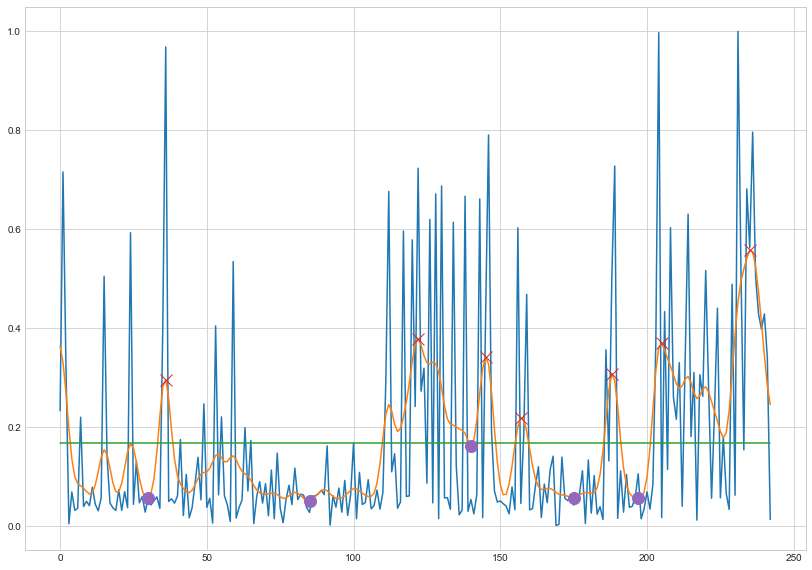

In [12]:
# FOR FINDING PEAKS

p = pathlib.Path('/Volumes/NO NAME/sleeper/computed_results/percentage_arrs/')
folders_list = ([x for x in sorted(p.iterdir()) if x.is_file()])

for i, f in tqdm_notebook(enumerate(folders_list)):
    diff_arr = np.load(f)
    
    # Scale to 0 to 1
    diff_arr = (diff_arr-diff_arr.min())/(diff_arr.max()-diff_arr.min())
    
    mean = np.mean(diff_arr)
    mean_line = np.repeat(mean, np.size(diff_arr))
    print(mean)
    smooth_arr = gaussian_filter1d(diff_arr, 2)
    
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(14., 10.))
    sns.lineplot(data=diff_arr)
    sns.lineplot(data=smooth_arr)
    sns.lineplot(data=mean_line)
    
    peaks, _ = signal.find_peaks(smooth_arr, width=3, height=mean)
    print("PEAKS: {}".format(peaks))
    plt.plot(peaks, smooth_arr[peaks], "x", markersize=12)
    
    valleys, valley_properties = signal.find_peaks(-smooth_arr, width=10)
    print("Valleys: {}".format(valleys))
    plt.plot(valleys, smooth_arr[valleys], "o", markersize=12)
    print(valley_properties)
    
    plt.show()
    
    if i == 3:
        break